In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functions import *

In [ ]:
path = 'M1_data'
#first we read data for 2016-2021 and put then into dictionary
#2016 is not utf-8
data = {2016: pd.read_csv('{0}/OpenData{1}.csv'.format(path,'2016'), sep = ';', encoding='Windows-1251')}
for i in range(2017,2019):
    data[i] = pd.read_csv('{0}/OpenData{1}.csv'.format(path,str(i)), sep =';')
#2019-2021 has another file names
for i in range(2019,2021):
    data[i] = pd.read_csv('{0}/OData{1}File.csv'.format(path,str(i)), sep =';', encoding='Windows-1251')

data[2021] = pd.read_csv('{0}/OData{1}File.csv'.format(path, '2021'), sep =';')
#Now we need to frix columns names. In some years they start from lower 'physBall100' in other from capital 'PhysBall100'
for i in data: data[i].columns = [j.lower() for j in data[i].columns]


C:\Users\Михаил\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (119) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Михаил\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (100,116,117,118,120,122,123,124,125) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
for i in data: data[i].columns = [j.lower() for j in data[i].columns]
phys_marks_data = [get_all_marks(data[i], 'physball100')[0] for i in range(2016,2022)]

E:\загрузки\учеба\1м семестр\ML_Poleshchuk\functions.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[subj][i[0]] = conv_val
E:\загрузки\учеба\1м семестр\ML_Poleshchuk\functions.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passed[subj] = passed[subj].astype(np.float)


In [4]:
years = list(range(2016,2022))
average_phys_marks = np.array([np.average(j['physball100']) for j in phys_marks_data])

In [5]:
phys_fails_data = [get_all_marks(data[i], 'physball100')[1] for i in range(2016,2022)]

In [6]:
average_phys_marks
#d = get_all_marks(data[2020], 'PhysBall100')

array([134.95231731, 134.06418049, 136.9232012 , 136.31584441,
       138.4203831 , 137.40850764])

In [7]:
math_marks_data = [get_all_marks(data[i], 'mathball100')[0] for i in range(2016,2022)]

In [8]:
average_math_marks = np.array([np.average(j['mathball100']) for j in math_marks_data])
math_fails_data = [get_all_marks(data[i], 'mathball100')[1] for i in range(2016,2022)]

In [9]:
average_math_marks

array([137.94307058, 140.56498975, 140.75686338, 139.36829723,
       138.44456582, 137.87315955])

In [12]:
chem_marks_data = [get_all_marks(data[i], 'chemball100')[0] for i in range(2016,2022)]

E:\загрузки\учеба\1м семестр\ML_Poleshchuk\functions.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[subj][i[0]] = conv_val
E:\загрузки\учеба\1м семестр\ML_Poleshchuk\functions.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passed[subj] = passed[subj].astype(np.float)


In [13]:
average_chem_marks = np.array([np.average(j['chemball100']) for j in chem_marks_data])
chem_fails_data = [get_all_marks(data[i], 'chemball100')[1] for i in range(2016,2022)]

In [14]:
bio_marks_data = [get_all_marks(data[i], 'bioball100')[0] for i in range(2016,2022)]

In [15]:
average_bio_marks = np.array([np.average(j['bioball100']) for j in bio_marks_data])
bio_fails_data = [get_all_marks(data[i], 'bioball100')[1] for i in range(2016,2022)]


Text(0.5, 1.0, 'Average mark of students who passed')

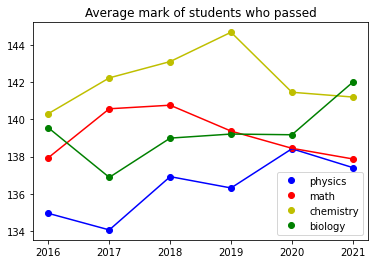

In [19]:
plt.plot(years, average_phys_marks, 'bo', label = 'physics')
plt.plot(years, average_math_marks, 'ro', label = 'math')
plt.plot(years, average_chem_marks, 'yo', label = 'chemistry')
plt.plot(years, average_bio_marks, 'go', label = 'biology')
plt.plot(years, average_phys_marks, 'b-')
plt.plot(years, average_math_marks, 'r-')
plt.plot(years, average_chem_marks, 'y-')
plt.plot(years, average_bio_marks, 'g-')
plt.legend()
plt.title('Average mark of students who passed')

In [22]:
np.size(phys_marks_data[0])

2458670

In [26]:
percent_of_fails_phys = [np.size(phys_fails_data[i])*100/(np.size(phys_fails_data[i])+np.size(phys_marks_data[i]))
                         for i in range(len(years))]
percent_of_fails_math = [np.size(math_fails_data[i])*100/(np.size(math_fails_data[i])+np.size(math_marks_data[i]))
                         for i in range(len(years))]
percent_of_fails_chem = [np.size(chem_fails_data[i])*100/(np.size(chem_fails_data[i])+np.size(chem_marks_data[i]))
                         for i in range(len(years))]
percent_of_fails_bio = [np.size(bio_fails_data[i])*100/(np.size(bio_fails_data[i])+np.size(bio_marks_data[i]))
                         for i in range(len(years))]

Text(0.5, 1.0, 'Percent of students who failed')

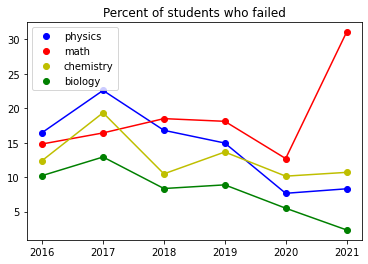

In [28]:
plt.plot(years, percent_of_fails_phys, 'bo', label = 'physics')
plt.plot(years, percent_of_fails_math, 'ro', label = 'math')
plt.plot(years, percent_of_fails_chem, 'yo', label = 'chemistry')
plt.plot(years, percent_of_fails_bio, 'go', label = 'biology')
plt.plot(years, percent_of_fails_phys, 'b-')
plt.plot(years, percent_of_fails_math, 'r-')
plt.plot(years, percent_of_fails_chem , 'y-')
plt.plot(years, percent_of_fails_bio, 'g-')
plt.legend()
plt.title('Percent of students who failed')